In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('sample.csv')

# Display basic information about the dataset
data.head
print(data.info())
print(data.describe())

   BOOKING_ID BOOKING_TYPE_NAME PRODUCT_NAME PLATFORM  CUSTOMER_ID  \
0   159585350           Reserve          Car  Desktop            0   
1   128623600            Cancel          Car  Desktop            0   
2    16125082           Reserve          Car   Mobile            0   
3   129001472           Reserve          Car  Desktop            0   
4    64792032           Reserve          Car  Desktop            0   

   TRAVELER_ID BOOKING_DATE TRAVEL_START  TRAVEL_END INVOICE_DATE  \
0         8833   10/08/2018   04/09/2018  07/09/2018          NaN   
1         8854   29/08/2018   04/09/2018  08/09/2018          NaN   
2         9166   05/09/2018   05/03/2019  12/03/2019          NaN   
3         9166   05/09/2018   05/03/2019  12/03/2019          NaN   
4         1457   14/09/2018   21/09/2018  24/09/2018          NaN   

   ONLINE_PURCHASE_FLAG  BOOKING_AMOUNT  SAVINGS_AMOUNT  TRANSACTION_COUNT  
0                  True          956.97             0.0                  8  
1         

In [19]:
data.head

<bound method NDFrame.head of        BOOKING_ID BOOKING_TYPE_NAME PRODUCT_NAME PLATFORM  CUSTOMER_ID  \
0       159585350           Reserve          Car  Desktop            0   
1       128623600            Cancel          Car  Desktop            0   
2        16125082           Reserve          Car   Mobile            0   
3       129001472           Reserve          Car  Desktop            0   
4        64792032           Reserve          Car  Desktop            0   
...           ...               ...          ...      ...          ...   
31627  1381839930          Purchase          Air  Desktop         1016   
31628    76912285            Cancel          Car   Mobile         1016   
31629   886197036          Purchase          Air  Desktop         1016   
31630   141463498          Purchase        Hotel  Desktop         1016   
31631    16282049           Reserve          Car  Desktop         1016   

       TRAVELER_ID BOOKING_DATE TRAVEL_START  TRAVEL_END INVOICE_DATE  \
0       

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

BOOKING_ID                   0
BOOKING_TYPE_NAME            0
PRODUCT_NAME                 0
PLATFORM                     2
CUSTOMER_ID                  0
TRAVELER_ID                  0
BOOKING_DATE                 0
TRAVEL_START                 3
TRAVEL_END                   3
INVOICE_DATE            102885
ONLINE_PURCHASE_FLAG         0
BOOKING_AMOUNT               0
SAVINGS_AMOUNT               0
TRANSACTION_COUNT            0
dtype: int64


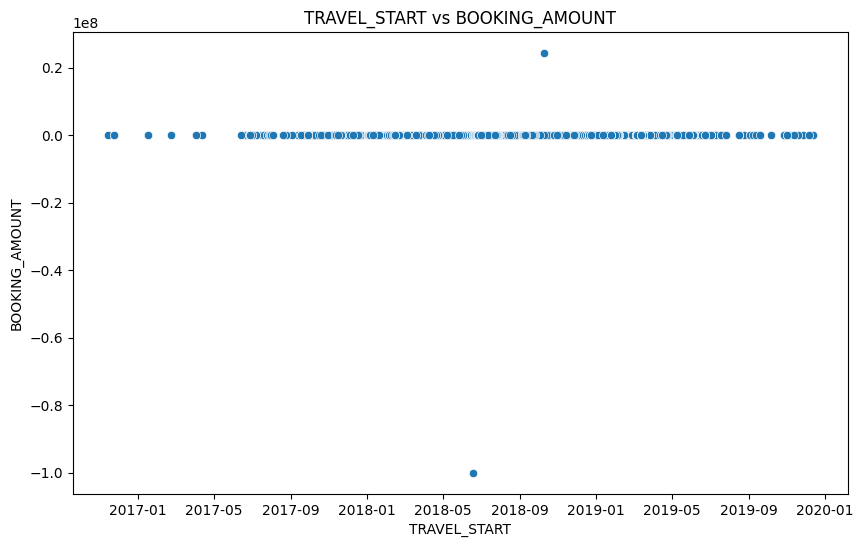

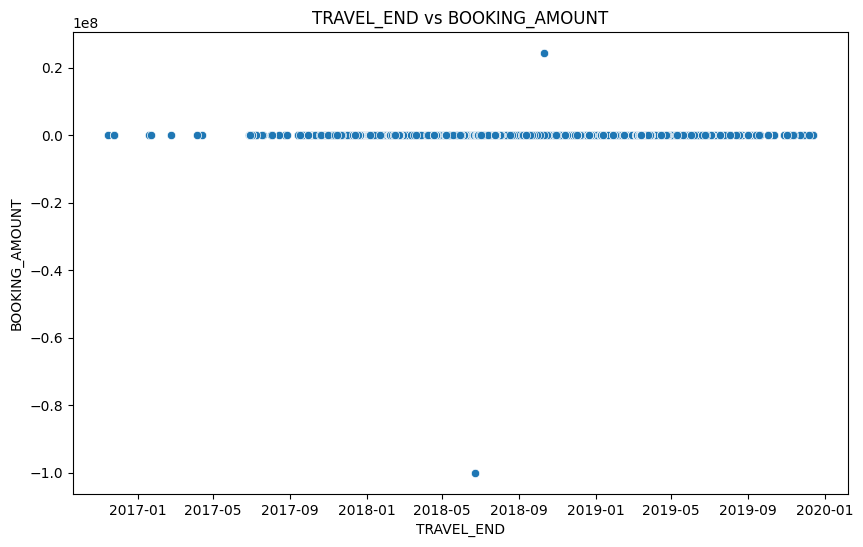

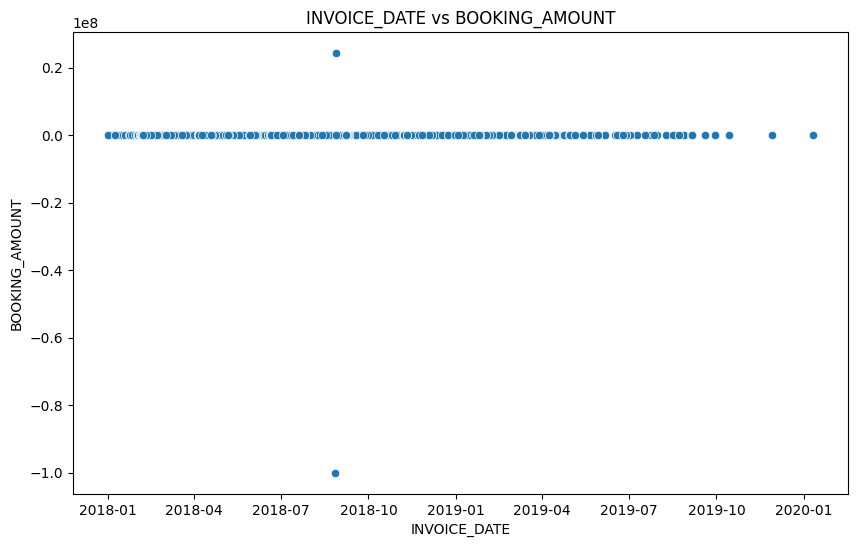

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

data_copy = data.copy()
# Convert date columns to datetime format with explicit date format
date_columns = ['TRAVEL_START', 'TRAVEL_END', 'INVOICE_DATE']
date_format = '%d/%m/%Y'

for col in date_columns:
    data_copy[col] = pd.to_datetime(data_copy[col], format=date_format)

# Plotting TRAVEL_START against BOOKING_AMOUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TRAVEL_START', y='BOOKING_AMOUNT', data=data_copy)
plt.title('TRAVEL_START vs BOOKING_AMOUNT')
plt.xlabel('TRAVEL_START')
plt.ylabel('BOOKING_AMOUNT')
plt.show()

# Plotting TRAVEL_END against BOOKING_AMOUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TRAVEL_END', y='BOOKING_AMOUNT', data=data_copy)
plt.title('TRAVEL_END vs BOOKING_AMOUNT')
plt.xlabel('TRAVEL_END')
plt.ylabel('BOOKING_AMOUNT')
plt.show()

# Plotting INVOICE_DATE against BOOKING_AMOUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INVOICE_DATE', y='BOOKING_AMOUNT', data=data_copy)
plt.title('INVOICE_DATE vs BOOKING_AMOUNT')
plt.xlabel('INVOICE_DATE')
plt.ylabel('BOOKING_AMOUNT')
plt.show()

In [6]:
# Calculate mean and median BOOKING_AMOUNT for each date column
mean_booking_start = data_copy.groupby('TRAVEL_START')['BOOKING_AMOUNT'].mean()
median_booking_start = data_copy.groupby('TRAVEL_START')['BOOKING_AMOUNT'].median()

mean_booking_end = data_copy.groupby('TRAVEL_END')['BOOKING_AMOUNT'].mean()
median_booking_end = data_copy.groupby('TRAVEL_END')['BOOKING_AMOUNT'].median()

mean_booking_invoice = data_copy.groupby('INVOICE_DATE')['BOOKING_AMOUNT'].mean()
median_booking_invoice = data_copy.groupby('INVOICE_DATE')['BOOKING_AMOUNT'].median()

# Display the calculated statistics
print("Mean Booking Amount for TRAVEL_START:")
print(mean_booking_start)

print("\nMedian Booking Amount for TRAVEL_START:")
print(median_booking_start)

print("\nMean Booking Amount for TRAVEL_END:")
print(mean_booking_end)

print("\nMedian Booking Amount for TRAVEL_END:")
print(median_booking_end)

print("\nMean Booking Amount for INVOICE_DATE:")
print(mean_booking_invoice)

print("\nMedian Booking Amount for INVOICE_DATE:")
print(median_booking_invoice)


Mean Booking Amount for TRAVEL_START:
TRAVEL_START
2016-11-14     638.40
2016-11-24   -1019.20
2017-01-16    -395.04
2017-02-23   -1346.64
2017-04-03    -725.35
               ...   
2019-11-12      50.00
2019-11-19    1699.80
2019-11-27     443.64
2019-12-06     698.50
2019-12-12    -162.55
Name: BOOKING_AMOUNT, Length: 640, dtype: float64

Median Booking Amount for TRAVEL_START:
TRAVEL_START
2016-11-14     638.40
2016-11-24   -1019.20
2017-01-16    -395.04
2017-02-23   -1346.64
2017-04-03    -725.35
               ...   
2019-11-12      50.00
2019-11-19    1699.80
2019-11-27     443.64
2019-12-06     698.50
2019-12-12    -162.55
Name: BOOKING_AMOUNT, Length: 640, dtype: float64

Mean Booking Amount for TRAVEL_END:
TRAVEL_END
2016-11-15      638.40
2016-11-25    -1019.20
2017-01-19     -395.04
2017-01-22     -395.04
2017-02-24    -1346.64
                ...   
2019-11-13    17349.00
2019-11-23     1699.80
2019-11-29      443.64
2019-12-07      698.50
2019-12-13     -162.55
Name: BOOK

In [7]:
# Define the period of the COVID-19 outbreak
covid_start_date = pd.to_datetime('2019-12-01')
covid_end_date = pd.to_datetime('2020-12-31')  # You can adjust this if needed

# Check if TRAVEL_START and TRAVEL_END dates fall within the COVID-19 period
travel_start_within_covid = data_copy[
    (data_copy['TRAVEL_START'] >= covid_start_date) &
    (data_copy['TRAVEL_START'] <= covid_end_date)
]

travel_end_within_covid = data_copy[
    (data_copy['TRAVEL_END'] >= covid_start_date) &
    (data_copy['TRAVEL_END'] <= covid_end_date)
]

# Calculate the counts of travel dates falling within the COVID-19 period
count_start_within_covid = len(travel_start_within_covid)
count_end_within_covid = len(travel_end_within_covid)

print(f"Count of TRAVEL_START dates within COVID-19 period: {count_start_within_covid}")
print(f"Count of TRAVEL_END dates within COVID-19 period: {count_end_within_covid}")

Count of TRAVEL_START dates within COVID-19 period: 3
Count of TRAVEL_END dates within COVID-19 period: 3


#TRAVEL_START and #TRAVEL_END:
Since these columns have a few missing values, I can consider imputing them using the mode or median


In [8]:
# Missing values Imputation TRAVEL_START and TRAVEL_END
mode_travel_start = data_copy['TRAVEL_START'].mode()[0]
mode_travel_end = data_copy['TRAVEL_END'].mode()[0]

data_copy['TRAVEL_START'].fillna(mode_travel_start, inplace=True)
data_copy['TRAVEL_END'].fillna(mode_travel_end, inplace=True)

#INVOICE_DATE:it has substantial number of missing values, I am going to  can impute them using the mode to maintain the data's integrity

In [9]:
#  missing values imputation  INVOICE_DATE
mode_invoice_date = data_copy['INVOICE_DATE'].mode()[0]

data_copy['INVOICE_DATE'].fillna(mode_invoice_date, inplace=True)

# As we see decline over a year i thought to focus on the Time-Series Analysis monthly trends in booking value and transactions.

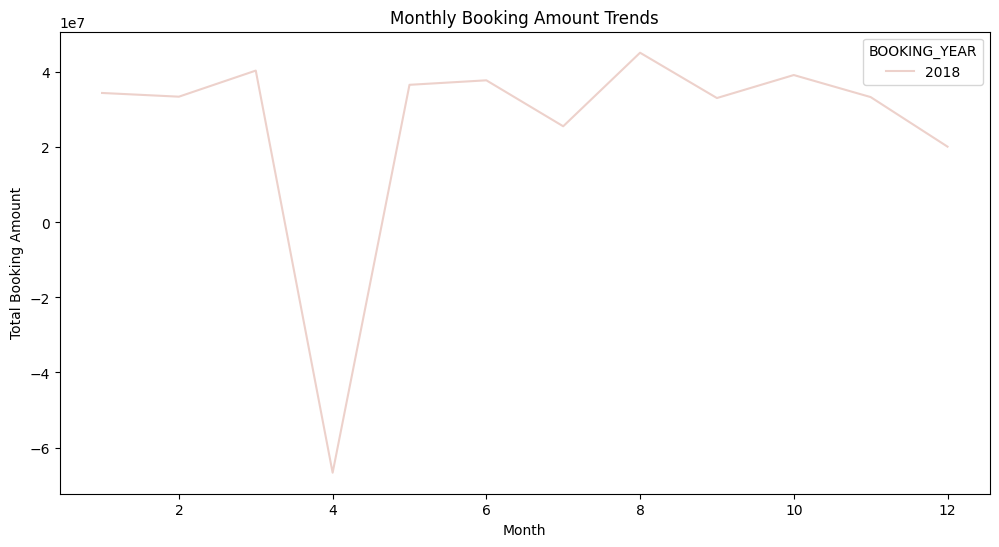

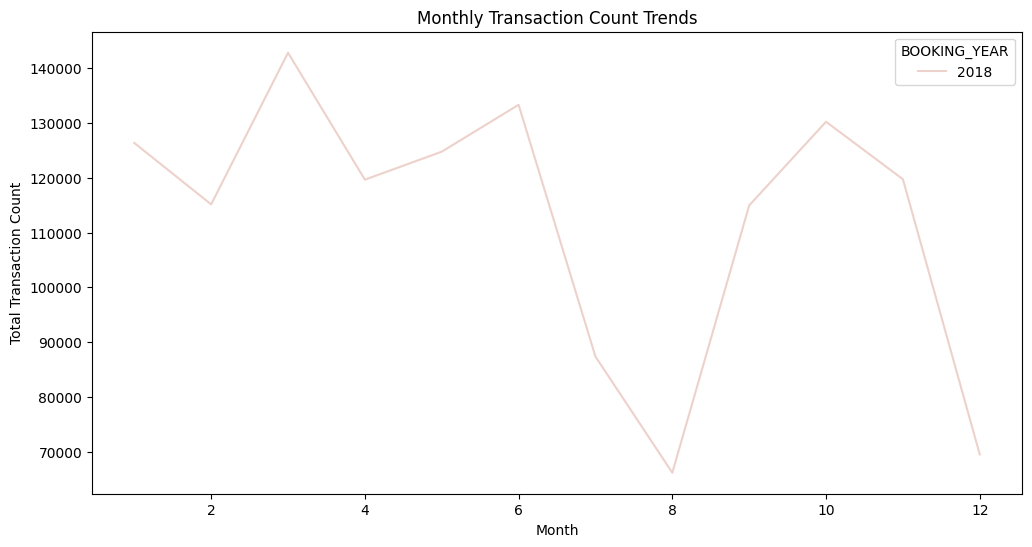

Monthly Booking Amounts:
BOOKING_YEAR  BOOKING_MONTH
2018          1                34499035.68
              2                33509844.03
              3                40460624.27
              4               -66714152.50
              5                36671089.57
              6                37870610.87
              7                25621714.20
              8                45224724.62
              9                33146547.39
              10               39277513.94
              11               33401569.21
              12               20193363.39
Name: BOOKING_AMOUNT, dtype: float64


In [10]:
# Extract month and year for grouping and analysis
#data['BOOKING_MONTH'] = data['BOOKING_DATE'].dt.month
#data['BOOKING_YEAR'] = data['BOOKING_DATE'].dt.year
data['BOOKING_DATE'] = pd.to_datetime(data['BOOKING_DATE'], format='%d/%m/%Y')
data['BOOKING_DATE'] = pd.to_datetime(data['BOOKING_DATE'])
data['BOOKING_MONTH'] = data['BOOKING_DATE'].dt.month
data['BOOKING_YEAR'] = data['BOOKING_DATE'].dt.year
# Group by month and year to examine trends
monthly_data = data.groupby(['BOOKING_YEAR', 'BOOKING_MONTH']).agg({
    'BOOKING_AMOUNT': 'sum',
    'TRANSACTION_COUNT': 'sum'
}).reset_index()

# Visualize monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='BOOKING_MONTH', y='BOOKING_AMOUNT', hue='BOOKING_YEAR', data=monthly_data)
plt.title('Monthly Booking Amount Trends')
plt.xlabel('Month')
plt.ylabel('Total Booking Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='BOOKING_MONTH', y='TRANSACTION_COUNT', hue='BOOKING_YEAR', data=monthly_data)
plt.title('Monthly Transaction Count Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Count')
plt.show()

 #Assuming you've already converted 'BOOKING_DATE' to datetime format as previously mentioned

# Extract month and year for grouping and analysis
data['BOOKING_MONTH'] = data['BOOKING_DATE'].dt.month
data['BOOKING_YEAR'] = data['BOOKING_DATE'].dt.year

# Group by month and year to get the sum of booking amounts
monthly_booking_sum = data.groupby(['BOOKING_YEAR', 'BOOKING_MONTH'])['BOOKING_AMOUNT'].sum()

# Print the sum of booking amounts for each month and year
print("Monthly Booking Amounts:")
print(monthly_booking_sum)

In [11]:
# Filter data for April 2018
april_2018_data = data[(data['BOOKING_DATE'].dt.year == 2018) & (data['BOOKING_DATE'].dt.month == 4)]

# Display transactions for April 2018 with negative booking amounts
negative_booking_april = april_2018_data[april_2018_data['BOOKING_AMOUNT'] < 0]

# Display negative booking transactions for further investigation
print("Negative Booking Amounts in April 2018:")
print(negative_booking_april)

Negative Booking Amounts in April 2018:
        BOOKING_ID BOOKING_TYPE_NAME PRODUCT_NAME PLATFORM  CUSTOMER_ID  \
191     1993928157    Partial Refund          Air  Desktop         1000   
388      410007325            Refund        Hotel  Desktop         1000   
404     1780013888            Refund          Air  Desktop         1000   
539      116978352            Cancel        Hotel  Desktop         1000   
621      403092557            Refund        Hotel  Desktop         1000   
...            ...               ...          ...      ...          ...   
299503   115291516            Refund        Hotel  Desktop         1078   
299526  1650681032            Refund          Air  Desktop         1078   
299527   412670284            Refund          Air  Desktop         1078   
299539  2411254930    Partial Refund          Air  Desktop         1078   
299560   519202818            Refund        Hotel   Mobile         1078   

        TRAVELER_ID BOOKING_DATE TRAVEL_START  TRAVEL_END I

#differentiate between refunds and cancellations and identify specific patterns related to these transactions in terms of various attributes,

In [12]:
# Filter data for refunds and cancellations in the negative_booking_april dataset
refunds = negative_booking_april[negative_booking_april['BOOKING_TYPE_NAME'].str.contains('Refund')]
cancellations = negative_booking_april[negative_booking_april['BOOKING_TYPE_NAME'].str.contains('Cancel')]

# Summary statistics for refunds and cancellations
print("Summary Statistics for Refunds:")
print(refunds.describe())

print("\nSummary Statistics for Cancellations:")
print(cancellations.describe())

# Analyze patterns or trends specific to refunds or cancellations in terms of various attributes
# For example, you can analyze platforms, product types, customer IDs, traveler IDs, etc. using value_counts(), groupby(), or visualizations.


Summary Statistics for Refunds:
         BOOKING_ID  CUSTOMER_ID  TRAVELER_ID  BOOKING_AMOUNT  SAVINGS_AMOUNT  \
count  1.700000e+03  1700.000000  1700.000000    1.700000e+03          1700.0   
mean   7.813112e+08  1039.510588  4041.602941   -6.099895e+04             0.0   
std    6.303201e+08    25.631068  2589.833603    2.425826e+06             0.0   
min    5.755535e+07  1000.000000   941.000000   -1.000213e+08             0.0   
25%    2.882310e+08  1017.000000  1352.000000   -2.156677e+03             0.0   
50%    5.262571e+08  1031.000000  3755.000000   -9.593800e+02             0.0   
75%    1.244987e+09  1068.000000  6315.000000   -4.075875e+02             0.0   
max    2.411255e+09  1078.000000  9998.000000   -1.251000e+01             0.0   

       TRANSACTION_COUNT  BOOKING_MONTH  BOOKING_YEAR  
count        1700.000000         1700.0        1700.0  
mean            4.448824            4.0        2018.0  
std             2.937504            0.0           0.0  
min           

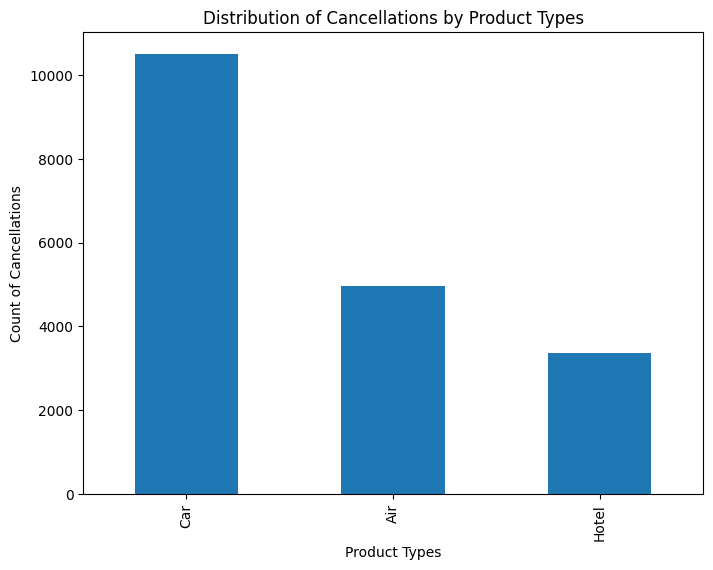

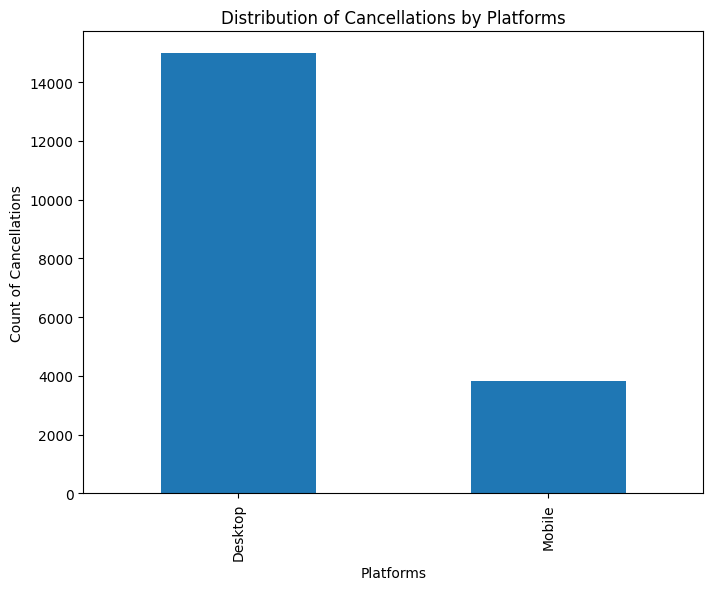

Top Customers with Most Refunds:
1018    244
1068    186
1078    140
1016    136
1061    105
1013     96
1017     81
1027     55
1077     50
1049     48
Name: CUSTOMER_ID, dtype: int64

Top Customers with Most Cancellations:
1018    8610
1068    1487
1016    1474
1027     623
1078     604
1061     473
1071     470
1049     444
1011     407
1063     384
Name: CUSTOMER_ID, dtype: int64

Top Travelers with Most Refunds:
1233    14
6365    13
1990    13
1215    11
1113    11
6471     9
1088     9
1240     9
1200     9
1232     9
Name: TRAVELER_ID, dtype: int64

Top Travelers with Most Cancellations:
1200    108
5444    106
6470    103
5446     98
1113     90
5442     83
1114     83
5445     81
7069     78
5440     77
Name: TRAVELER_ID, dtype: int64


In [13]:
# Cancellations specific analysis
cancellations = data[(data['BOOKING_AMOUNT'] < 0) & (data['BOOKING_TYPE_NAME'].isin(['Cancel', 'Partial Refund']))]

# Product Types Analysis for Cancellations
cancellations['PRODUCT_NAME'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Cancellations by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Cancellations')
plt.show()

# Platform Analysis for Cancellations
cancellations['PLATFORM'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Cancellations by Platforms')
plt.xlabel('Platforms')
plt.ylabel('Count of Cancellations')
plt.show()
# Top N Customers and Travelers with Most Refunds and Cancellations
top_refund_customers = refunds['CUSTOMER_ID'].value_counts().head(10)
top_cancel_customers = cancellations['CUSTOMER_ID'].value_counts().head(10)
top_refund_travelers = refunds['TRAVELER_ID'].value_counts().head(10)
top_cancel_travelers = cancellations['TRAVELER_ID'].value_counts().head(10)

print("Top Customers with Most Refunds:")
print(top_refund_customers)
print("\nTop Customers with Most Cancellations:")
print(top_cancel_customers)
print("\nTop Travelers with Most Refunds:")
print(top_refund_travelers)
print("\nTop Travelers with Most Cancellations:")
print(top_cancel_travelers)

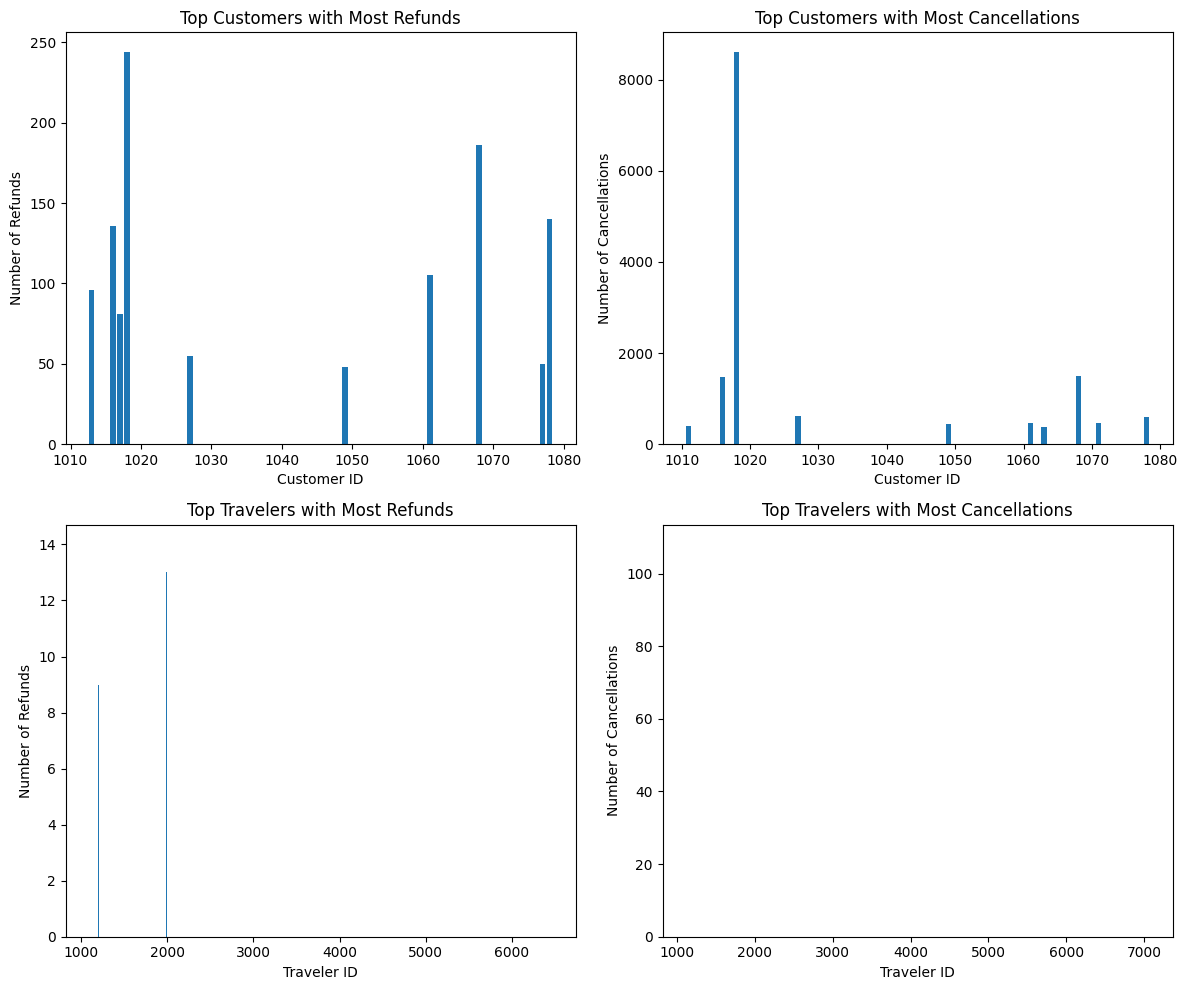

In [8]:
import matplotlib.pyplot as plt

# Top Customers with Most Refunds
top_customers_refunds = {
    1018: 244,
    1068: 186,
    1078: 140,
    1016: 136,
    1061: 105,
    1013: 96,
    1017: 81,
    1027: 55,
    1077: 50,
    1049: 48
}

# Top Customers with Most Cancellations
top_customers_cancellations = {
    1018: 8610,
    1068: 1487,
    1016: 1474,
    1027: 623,
    1078: 604,
    1061: 473,
    1071: 470,
    1049: 444,
    1011: 407,
    1063: 384
}

# Top Travelers with Most Refunds
top_travelers_refunds = {
    1233: 14,
    6365: 13,
    1990: 13,
    1215: 11,
    1113: 11,
    6471: 9,
    1088: 9,
    1240: 9,
    1200: 9,
    1232: 9
}

# Top Travelers with Most Cancellations
top_travelers_cancellations = {
    1200: 108,
    5444: 106,
    6470: 103,
    5446: 98,
    1113: 90,
    5442: 83,
    1114: 83,
    5445: 81,
    7069: 78,
    5440: 77
}

# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Top Customers with Most Refunds
axs[0, 0].bar(top_customers_refunds.keys(), top_customers_refunds.values())
axs[0, 0].set_title('Top Customers with Most Refunds')
axs[0, 0].set_xlabel('Customer ID')
axs[0, 0].set_ylabel('Number of Refunds')

# Top Customers with Most Cancellations
axs[0, 1].bar(top_customers_cancellations.keys(), top_customers_cancellations.values())
axs[0, 1].set_title('Top Customers with Most Cancellations')
axs[0, 1].set_xlabel('Customer ID')
axs[0, 1].set_ylabel('Number of Cancellations')

# Top Travelers with Most Refunds
axs[1, 0].bar(top_travelers_refunds.keys(), top_travelers_refunds.values())
axs[1, 0].set_title('Top Travelers with Most Refunds')
axs[1, 0].set_xlabel('Traveler ID')
axs[1, 0].set_ylabel('Number of Refunds')

# Top Travelers with Most Cancellations
axs[1, 1].bar(top_travelers_cancellations.keys(), top_travelers_cancellations.values())
axs[1, 1].set_title('Top Travelers with Most Cancellations')
axs[1, 1].set_xlabel('Traveler ID')
axs[1, 1].set_ylabel('Number of Cancellations')

plt.tight_layout()
plt.show()


In [37]:
# Calculate counts of refunds and cancellations by PRODUCT_NAME
refunds_by_product = refunds['PRODUCT_NAME'].value_counts()
cancellations_by_product = cancellations['PRODUCT_NAME'].value_counts()

# Calculate counts of refunds and cancellations by PLATFORM
refunds_by_platform = refunds['PLATFORM'].value_counts()
cancellations_by_platform = cancellations['PLATFORM'].value_counts()

# Display tables
print("Refunds by Product:")
print(refunds_by_product)
print("\nCancellations by Product:")
print(cancellations_by_product)

print("\nRefunds by Platform:")
print(refunds_by_platform)
print("\nCancellations by Platform:")
print(cancellations_by_platform)

Refunds by Product:
Hotel    12393
Car      10499
Air       8533
Name: PRODUCT_NAME, dtype: int64

Cancellations by Product:
Car      10499
Air       4961
Hotel     3364
Name: PRODUCT_NAME, dtype: int64

Refunds by Platform:
Desktop    24966
Mobile      6459
Name: PLATFORM, dtype: int64

Cancellations by Platform:
Desktop    14982
Mobile      3842
Name: PLATFORM, dtype: int64


# investigate date discrepencies

In [14]:
# Check for inconsistencies in date columns
date_format = "%d/%m/%Y"

for col in date_columns:
    data_copy[col] = pd.to_datetime(data_copy[col], errors='coerce', format=date_format)

# Check for inconsistencies or errors in date entries
inconsistencies = data_copy[date_columns].isnull().sum()
print("Count of Missing or Inconsistent Dates:")
print(inconsistencies)

Count of Missing or Inconsistent Dates:
TRAVEL_START    0
TRAVEL_END      0
INVOICE_DATE    0
dtype: int64


#investigating duration of bookings

In [15]:
# Calculate duration between booking and travel dates for refunds and cancellations
data_copy['BOOKING_DATE'] = pd.to_datetime(data_copy['BOOKING_DATE'])
data_copy['TRAVEL_START'] = pd.to_datetime(data_copy['TRAVEL_START'])

# Calculate duration between booking and travel dates
data_copy['DURATION_BOOKING_TRAVEL'] = (data_copy['TRAVEL_START'] - data_copy['BOOKING_DATE']).dt.days

# Filter for refunds and cancellations
refunds = data_copy[data_copy['BOOKING_TYPE_NAME'] == 'Refund']
cancellations = data_copy[data_copy['BOOKING_TYPE_NAME'] == 'Cancel']

# Analyze the duration for refunds and cancellations
refunds_duration = refunds['DURATION_BOOKING_TRAVEL']
cancellations_duration = cancellations['DURATION_BOOKING_TRAVEL']

# Calculate summary statistics or visualizations for these durations
# For instance:
print("Summary Statistics for Refunds Duration:")
print(refunds_duration.describe())

print("\nSummary Statistics for Cancellations Duration:")
print(cancellations_duration.describe())

Summary Statistics for Refunds Duration:
count    13058.000000
mean         2.710982
std         90.080651
min       -555.000000
25%          0.000000
50%          4.000000
75%         23.000000
max        426.000000
Name: DURATION_BOOKING_TRAVEL, dtype: float64

Summary Statistics for Cancellations Duration:
count    14005.000000
mean         2.226562
std         90.896371
min       -365.000000
25%          0.000000
50%          4.000000
75%         21.000000
max        398.000000
Name: DURATION_BOOKING_TRAVEL, dtype: float64


<ipython-input-15-9f77a73d4ae3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_copy['BOOKING_DATE'] = pd.to_datetime(data_copy['BOOKING_DATE'])


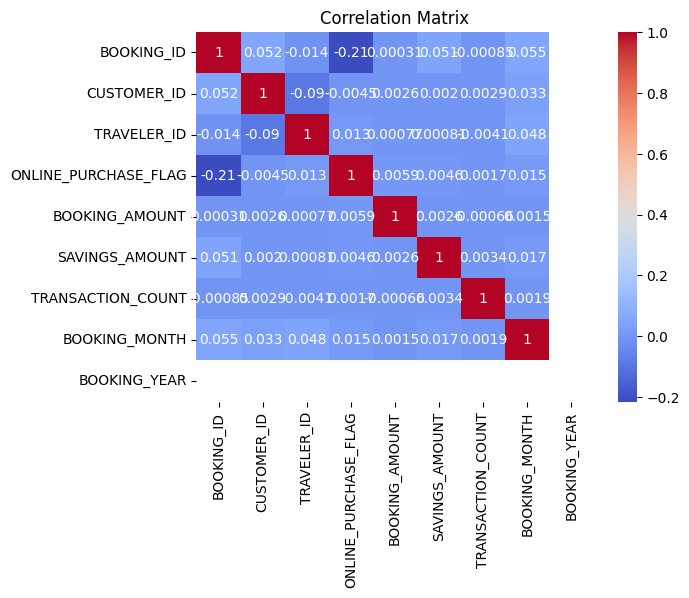

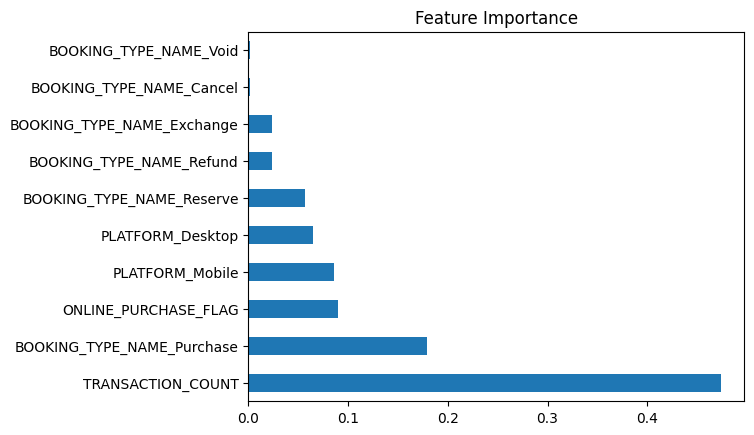

In [17]:
# Correlation analysis
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature importance (if performing regression)
from sklearn.ensemble import RandomForestRegressor

# Prepare data for feature importance
X = data[['BOOKING_TYPE_NAME', 'PLATFORM', 'ONLINE_PURCHASE_FLAG', 'TRANSACTION_COUNT']]
y = data['BOOKING_AMOUNT']
X = pd.get_dummies(X)

# Train RandomForestRegressor to get feature importance
model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [23]:
# Example using Causal Impact (if causal analysis is the aim)
!pip install pycausalimpact
from causalimpact import CausalImpact
from datetime import datetime
date_format = '%d/%m/%Y'

start_date_pre = pd.to_datetime('01/01/2018', format=date_format)
end_date_pre = pd.to_datetime('30/06/2018', format=date_format)
start_date_post = pd.to_datetime('01/07/2018', format=date_format)
end_date_post = pd.to_datetime('31/12/2018', format=date_format)
import pandas as pd

# Assuming your dataset is named 'data'
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_columns]

# Create a CausalImpact object
impact = CausalImpact(numeric_data, pre_period=[start_date_pre, end_date_pre], post_period=[start_date_post, end_date_post])


# Create a CausalImpact object
#impact = CausalImpact(data, pre_period=[start_date, end_date], post_period=[start_date, end_date])

# Plot causal impact analysis results
impact.plot()

ValueError: ignored

In [1]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Car']

# Group the data by 'CUSTOMER_ID' and count the number of reservations for each customer
reservations_count = car_bookings.groupby('CUSTOMER_ID')['BOOKING_ID'].count()

# Find the customer with the maximum reservations
customer_with_max_reservations = reservations_count.idxmax()

# Get the total booking amount for the customer with the most reservations
total_amount = car_bookings[car_bookings['CUSTOMER_ID'] == customer_with_max_reservations]['BOOKING_AMOUNT'].sum()

print(f"Customer with ID {customer_with_max_reservations} made the most car reservations, with a total amount of ${total_amount}")


Customer with ID 1005 made the most car reservations, with a total amount of $265115.56


In [3]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Car']

# Group the data by 'CUSTOMER_ID' and count the number of reservations for each customer
reservations_count = car_bookings.groupby('CUSTOMER_ID')['BOOKING_ID'].count()

# Find the customer with the maximum reservations
customer_with_max_reservations = reservations_count.idxmax()

# Get the total booking amount for the customer with the most reservations
total_amount = car_bookings[car_bookings['CUSTOMER_ID'] == customer_with_max_reservations]['BOOKING_AMOUNT'].sum()

# Check if the customer with the most reservations has cancellations/refunds
cancellations_refunds = car_bookings[(car_bookings['CUSTOMER_ID'] == customer_with_max_reservations) & (car_bookings['BOOKING_AMOUNT'] < 0)]

if not cancellations_refunds.empty:
    print(f"Customer with ID {customer_with_max_reservations} made the most car reservations, with a total amount of ${total_amount}")
    print("This customer also has cancellations or refunds.")
    print("Details of cancellations/refunds:")
    print(cancellations_refunds)
else:
    print(f"Customer with ID {customer_with_max_reservations} made the most car reservations, with a total amount of ${total_amount}")
    print("This customer has no cancellations or refunds.")


Customer with ID 1005 made the most car reservations, with a total amount of $265115.56
This customer also has cancellations or refunds.
Details of cancellations/refunds:
       BOOKING_ID BOOKING_TYPE_NAME PRODUCT_NAME PLATFORM  CUSTOMER_ID  \
8167     75054270            Cancel          Car  Desktop         1005   
8178    105011781            Cancel          Car  Desktop         1005   
8181    145599400            Cancel          Car  Desktop         1005   
8191     30948780            Cancel          Car  Desktop         1005   
8196     50033022            Cancel          Car  Desktop         1005   
...           ...               ...          ...      ...          ...   
10086    97234170            Cancel          Car  Desktop         1005   
10089   165962320            Cancel          Car  Desktop         1005   
10090    79450450            Cancel          Car  Desktop         1005   
10097   113656543            Cancel          Car  Desktop         1005   
10106    154944

In [5]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Car']

# Group bookings by CUSTOMER_ID and BOOKING_ID
grouped_bookings = car_bookings.groupby(['CUSTOMER_ID', 'BOOKING_ID']).sum().reset_index()

# Filter out bookings where the amount is negative (cancellations/refunds)
cancellations_refunds = grouped_bookings[grouped_bookings['BOOKING_AMOUNT'] < 0]

# Find reservations with corresponding cancellations/refunds for the same customer
for index, row in cancellations_refunds.iterrows():
    customer_id = row['CUSTOMER_ID']
    booking_id = row['BOOKING_ID']
    refund_amount = abs(row['BOOKING_AMOUNT'])  # Taking absolute value for refunded amount

    # Check if there's a reservation with the same customer and booking ID
    reservation_amount = grouped_bookings[
        (grouped_bookings['CUSTOMER_ID'] == customer_id) & (grouped_bookings['BOOKING_ID'] == booking_id)
    ]['BOOKING_AMOUNT']

    if not reservation_amount.empty:
        reservation_amount = reservation_amount.values[0]
        print(f"Customer {customer_id} with Booking ID {booking_id}:")
        print(f"Reservation Amount: {reservation_amount}, Refund Amount: {refund_amount}")
        print(f"Net Loss: {refund_amount - reservation_amount}\n")


<ipython-input-5-50a54a382003>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bookings = car_bookings.groupby(['CUSTOMER_ID', 'BOOKING_ID']).sum().reset_index()


Customer 0.0 with Booking ID 15871678.0:
Reservation Amount: -145.3, Refund Amount: 145.3
Net Loss: 290.6

Customer 0.0 with Booking ID 16059477.0:
Reservation Amount: -486.0, Refund Amount: 486.0
Net Loss: 972.0

Customer 0.0 with Booking ID 16125097.0:
Reservation Amount: -6999.96, Refund Amount: 6999.96
Net Loss: 13999.92

Customer 0.0 with Booking ID 16125185.0:
Reservation Amount: -2354.0, Refund Amount: 2354.0
Net Loss: 4708.0

Customer 0.0 with Booking ID 16254463.0:
Reservation Amount: -315.84, Refund Amount: 315.84
Net Loss: 631.68

Customer 0.0 with Booking ID 32250172.0:
Reservation Amount: -796.5, Refund Amount: 796.5
Net Loss: 1593.0

Customer 0.0 with Booking ID 32250182.0:
Reservation Amount: -778.92, Refund Amount: 778.92
Net Loss: 1557.84

Customer 0.0 with Booking ID 32250216.0:
Reservation Amount: -1147.8, Refund Amount: 1147.8
Net Loss: 2295.6

Customer 0.0 with Booking ID 32250362.0:
Reservation Amount: -1883.2, Refund Amount: 1883.2
Net Loss: 3766.4

Customer 0.0 

<ipython-input-10-949e9cea6471>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bookings = car_bookings.groupby(['CUSTOMER_ID', 'BOOKING_ID']).sum().reset_index()


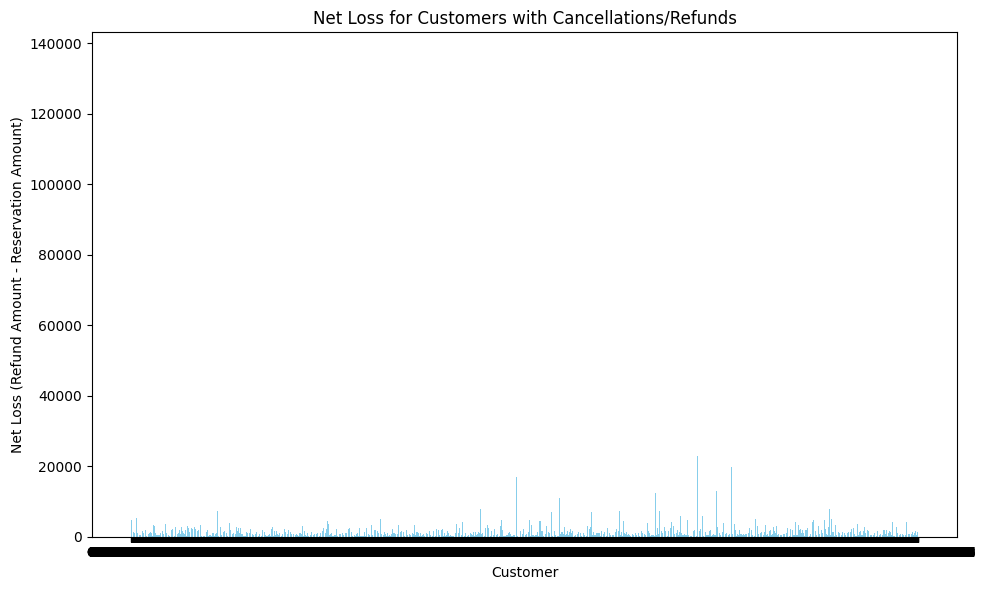

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'sample.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Car']

# Group bookings by CUSTOMER_ID and BOOKING_ID
grouped_bookings = car_bookings.groupby(['CUSTOMER_ID', 'BOOKING_ID']).sum().reset_index()

# Filter out bookings where the amount is negative (cancellations/refunds)
cancellations_refunds = grouped_bookings[grouped_bookings['BOOKING_AMOUNT'] < 0]

# Calculate net loss for each customer with cancellations/refunds
net_loss = []
for index, row in cancellations_refunds.iterrows():
    customer_id = row['CUSTOMER_ID']
    booking_id = row['BOOKING_ID']
    refund_amount = abs(row['BOOKING_AMOUNT'])  # Taking absolute value for refunded amount

    # Check if there's a reservation with the same customer and booking ID
    reservation_amount = grouped_bookings[
        (grouped_bookings['CUSTOMER_ID'] == customer_id) & (grouped_bookings['BOOKING_ID'] == booking_id)
    ]['BOOKING_AMOUNT']

    if not reservation_amount.empty:
        reservation_amount = reservation_amount.values[0]
        net_loss.append(refund_amount - reservation_amount)

# Plotting the net loss for customers with cancellations/refunds
plt.figure(figsize=(10, 6))
plt.bar(range(len(net_loss)), net_loss, color='skyblue')
plt.xlabel('Customer')
plt.ylabel('Net Loss (Refund Amount - Reservation Amount)')
plt.title('Net Loss for Customers with Cancellations/Refunds')
plt.xticks(range(len(net_loss)), [f"Customer {i+1}" for i in range(len(net_loss))])
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Hotel']

# Group bookings by CUSTOMER_ID and count the number of reservations and cancellations
customer_activities = car_bookings.groupby('CUSTOMER_ID')['BOOKING_ID'].agg(['count', 'nunique']).reset_index()
customer_activities.columns = ['CUSTOMER_ID', 'Total_Bookings', 'Unique_Bookings']

# Calculate the ratio of unique bookings to total bookings for each customer
customer_activities['Booking_Ratio'] = customer_activities['Unique_Bookings'] / customer_activities['Total_Bookings']

# Identify customers with a high cancellation ratio and significant booking loss
fraud_potential_customers = customer_activities[
    (customer_activities['Booking_Ratio'] < 0.2)  # Adjust the threshold as needed
    & (customer_activities['Total_Bookings'] > 5)  # Filtering customers with a certain number of bookings
]

# Print potential fraudulent customers
print("Potential fraudulent customers based on booking and cancellation patterns:")
print(fraud_potential_customers[['CUSTOMER_ID', 'Total_Bookings', 'Unique_Bookings', 'Booking_Ratio']])


Potential fraudulent customers based on booking and cancellation patterns:
Empty DataFrame
Columns: [CUSTOMER_ID, Total_Bookings, Unique_Bookings, Booking_Ratio]
Index: []


In [11]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Car']

# Group bookings by CUSTOMER_ID and count the number of reservations and cancellations
customer_activities = car_bookings.groupby('CUSTOMER_ID')['BOOKING_ID'].agg(['count', 'nunique']).reset_index()
customer_activities.columns = ['CUSTOMER_ID', 'Total_Bookings', 'Unique_Bookings']

# Calculate the ratio of unique bookings to total bookings for each customer
customer_activities['Booking_Ratio'] = customer_activities['Unique_Bookings'] / customer_activities['Total_Bookings']

# Filter customers with a high cancellation ratio
potential_fraud_customers = customer_activities[
    (customer_activities['Booking_Ratio'] < 0.2)  # Adjust the threshold as needed
    & (customer_activities['Total_Bookings'] > 5)  # Consider customers with a certain number of bookings
]

# Check for customers who have negative total booking amounts (indicating refunds)
refund_customers = car_bookings.groupby('CUSTOMER_ID')['BOOKING_AMOUNT'].sum().reset_index()
refund_customers = refund_customers[refund_customers['BOOKING_AMOUNT'] < 0]

# Identify potential fraudulent customers who both cancel frequently and receive refunds
potential_fraud_refund_customers = pd.merge(
    potential_fraud_customers, refund_customers, on='CUSTOMER_ID', how='inner'
)

# Print potential fraudulent customers
print("Potential fraudulent customers based on booking and refund patterns:")
print(potential_fraud_refund_customers[['CUSTOMER_ID', 'Total_Bookings', 'Unique_Bookings', 'Booking_Ratio']])


Potential fraudulent customers based on booking and refund patterns:
Empty DataFrame
Columns: [CUSTOMER_ID, Total_Bookings, Unique_Bookings, Booking_Ratio]
Index: []


In [13]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Filter the data for bookings under the 'Car' category
car_bookings = data[data['PRODUCT_NAME'] == 'Car']

# Group bookings by CUSTOMER_ID and count the number of reservations and cancellations
customer_activities = car_bookings.groupby('CUSTOMER_ID')['BOOKING_ID'].agg(['count', 'nunique']).reset_index()
customer_activities.columns = ['CUSTOMER_ID', 'Total_Bookings', 'Unique_Bookings']

# Calculate the ratio of unique bookings to total bookings for each customer
customer_activities['Booking_Ratio'] = customer_activities['Unique_Bookings'] / customer_activities['Total_Bookings']

# Filter customers with a high cancellation ratio
potential_fraud_customers = customer_activities[
    (customer_activities['Booking_Ratio'] < 0.2)  # Adjust the threshold as needed
    & (customer_activities['Total_Bookings'] > 5)  # Consider customers with a certain number of bookings
]

# Check for customers who have a high number of cancellations without refunds
cancellation_only_customers = car_bookings[car_bookings['BOOKING_AMOUNT'] < 0].groupby('CUSTOMER_ID')['BOOKING_ID'].count().reset_index()
cancellation_only_customers.columns = ['CUSTOMER_ID', 'Cancellation_Count']

# Identify potential fraudulent customers who frequently cancel without refunds
potential_fraud_cancellation_only_customers = pd.merge(
    potential_fraud_customers, cancellation_only_customers, on='CUSTOMER_ID', how='inner'
)

# Print potential fraudulent customers
print("Potential fraudulent customers based on frequent cancellations without refunds:")
print(potential_fraud_cancellation_only_customers[['CUSTOMER_ID', 'Total_Bookings', 'Unique_Bookings', 'Booking_Ratio', 'Cancellation_Count']])


Potential fraudulent customers based on frequent cancellations without refunds:
Empty DataFrame
Columns: [CUSTOMER_ID, Total_Bookings, Unique_Bookings, Booking_Ratio, Cancellation_Count]
Index: []


In [12]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('sample.csv')  # Replace 'your_data.csv' with your file name

# Choose a specific product name to analyze
selected_product = 'Air'  # Replace 'Car' with the product name you want to analyze

# Filter the data for the selected product name
selected_product_data = data[data['PRODUCT_NAME'] == selected_product]

# Analyze the savings amount for the selected product
positive_savings = selected_product_data[selected_product_data['SAVINGS_AMOUNT'] > 0]
negative_savings = selected_product_data[selected_product_data['SAVINGS_AMOUNT'] < 0]
zero_savings = selected_product_data[selected_product_data['SAVINGS_AMOUNT'] == 0]

print(f"Savings amount analysis for {selected_product}:")
print(f"Positive Savings Count: {len(positive_savings)}")
print(f"Negative Savings Count: {len(negative_savings)}")
print(f"Zero Savings Count: {len(zero_savings)}")


Savings amount analysis for Air:
Positive Savings Count: 13620
Negative Savings Count: 3119
Zero Savings Count: 114828


Total Bookings in April 2018: 6764
Cancellations in April 2018: 0
Refunds in April 2018: 414


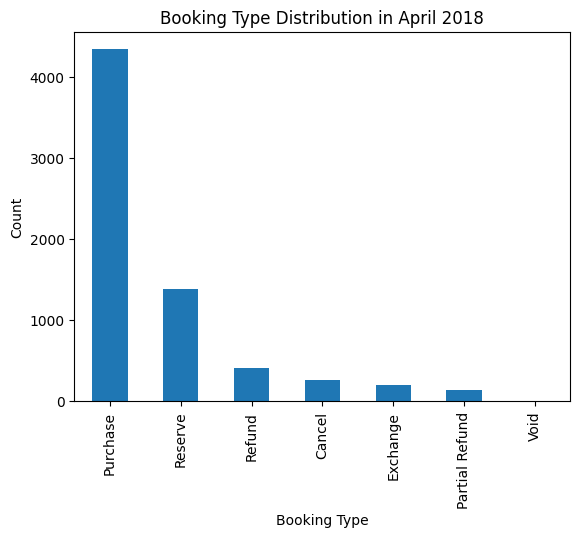

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

dateparse = lambda x: pd.to_datetime(x, errors='coerce', dayfirst=True)
data = pd.read_csv('sample.csv', parse_dates=['BOOKING_DATE', 'TRAVEL_START', 'TRAVEL_END', 'INVOICE_DATE'], date_parser=dateparse, low_memory=False)

# Filter data for April 2018
april_2018_data = data[(data['BOOKING_DATE'].dt.year == 2018) & (data['BOOKING_DATE'].dt.month == 4)]


# Count total bookings, cancellations, and refunds in April 2018
total_bookings = april_2018_data['BOOKING_ID'].count()
cancellations = april_2018_data[april_2018_data['BOOKING_TYPE_NAME'] == 'Cancellation']['BOOKING_ID'].count()
refunds = april_2018_data[april_2018_data['BOOKING_TYPE_NAME'] == 'Refund']['BOOKING_ID'].count()

# Print the counts
print(f"Total Bookings in April 2018: {total_bookings}")
print(f"Cancellations in April 2018: {cancellations}")
print(f"Refunds in April 2018: {refunds}")

# Visualize the data
status_counts = april_2018_data['BOOKING_TYPE_NAME'].value_counts()
status_counts.plot(kind='bar', title='Booking Type Distribution in April 2018')
plt.xlabel('Booking Type')
plt.ylabel('Count')
plt.show()



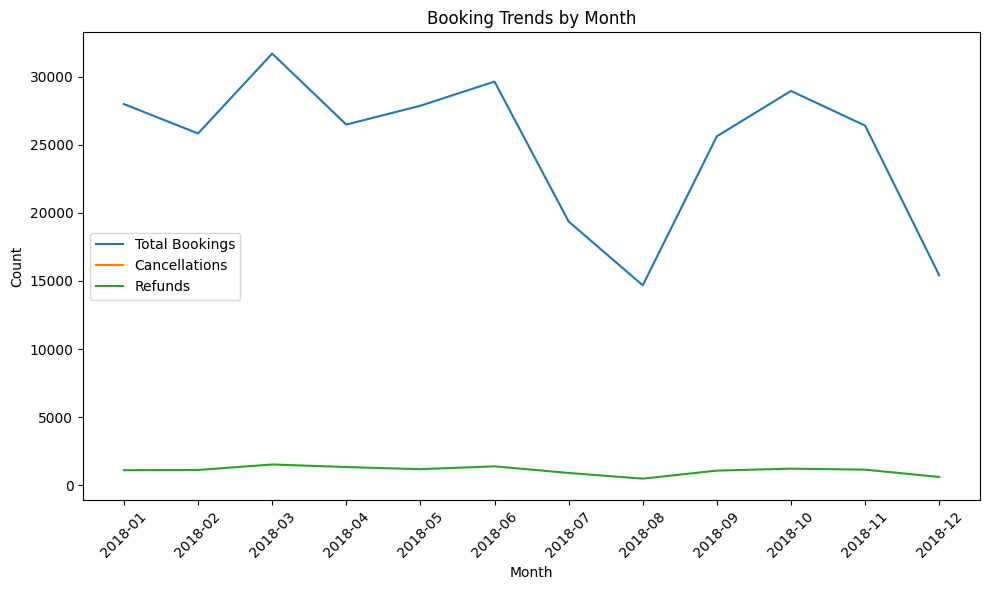

Total Booking Amount: 313162484.67
Total Bookings: 300000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with specifying date parsing and handling mixed types
dateparse = lambda x: pd.to_datetime(x, errors='coerce', dayfirst=True)
data = pd.read_csv('sample.csv', parse_dates=['BOOKING_DATE', 'TRAVEL_START', 'TRAVEL_END', 'INVOICE_DATE'], date_parser=dateparse, low_memory=False)

# Extract month and year information for each booking date
data['YearMonth'] = data['BOOKING_DATE'].dt.to_period('M')

# Calculate total bookings, cancellations, and refunds for each month
monthly_stats = data.groupby('YearMonth')['BOOKING_ID'].count().reset_index(name='TotalBookings')
monthly_stats['Cancellations'] = data[data['BOOKING_TYPE_NAME'] == 'Cancellation'].groupby('YearMonth')['BOOKING_ID'].count().reset_index(drop=True)
monthly_stats['Refunds'] = data[data['BOOKING_TYPE_NAME'] == 'Refund'].groupby('YearMonth')['BOOKING_ID'].count().reset_index(drop=True)

# Convert YearMonth to strings for plotting
monthly_stats['YearMonth'] = monthly_stats['YearMonth'].astype(str)

# Plotting the trends
plt.figure(figsize=(10, 6))

plt.plot(monthly_stats['YearMonth'], monthly_stats['TotalBookings'], label='Total Bookings')
plt.plot(monthly_stats['YearMonth'], monthly_stats['Cancellations'], label='Cancellations')
plt.plot(monthly_stats['YearMonth'], monthly_stats['Refunds'], label='Refunds')

plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
total_booking_amount = data['BOOKING_AMOUNT'].sum()
total_bookings = data['BOOKING_ID'].count()

print(f"Total Booking Amount: {total_booking_amount}")
print(f"Total Bookings: {total_bookings}")



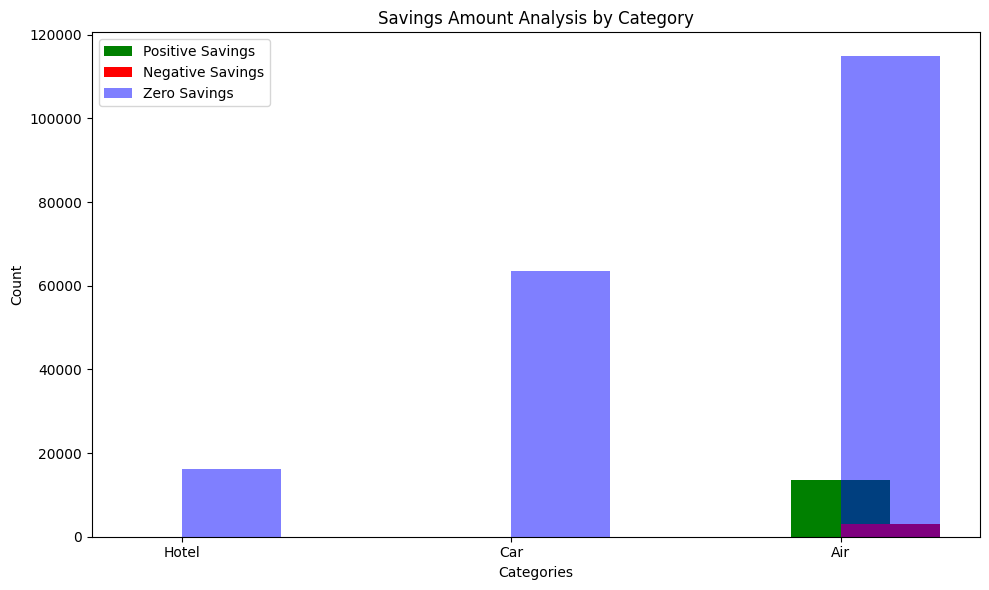

In [13]:
import matplotlib.pyplot as plt

# Data
categories = ['Hotel', 'Car', 'Air']
positive_counts = [0, 0, 13620]
negative_counts = [0, 0, 3119]
zero_counts = [16303, 63637, 114828]

# Plotting the data
bar_width = 0.3
index = range(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(index, positive_counts, width=bar_width, label='Positive Savings', color='g', align='center')
plt.bar(index, negative_counts, width=bar_width, label='Negative Savings', color='r', align='edge')
plt.bar(index, zero_counts, width=bar_width, label='Zero Savings', color='b', align='edge', alpha=0.5)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Savings Amount Analysis by Category')
plt.xticks(index, categories)
plt.legend()

plt.tight_layout()
plt.show()
